In [12]:
import os
from pathlib import Path

In [13]:
!ls ../train_results/model_yolov8_tf_yolov8m_imgsz_640_epochs_73_batch_16_dataset_v2

args.yaml
events.out.tfevents.1690885239.6141e3cddeb0.863.0
events.out.tfevents.1690917646.5928d293ac80.1330.0
events.out.tfevents.1690983791.95d5cc4e3cbc.718.0
events.out.tfevents.1690987626.660e4c55a509.895.0
events.out.tfevents.1690999910.94a340f8b69c.1667.0
events.out.tfevents.1691015472.dadc6e62549d.1526.0
events.out.tfevents.1691072798.d300156b5c52.789.0
events.out.tfevents.1691336192.f4b973170475.855.0
labels.jpg
labels_correlogram.jpg
results.csv
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
weights


In [14]:
HOME = "../train_results/model_yolov8_tf_yolov8m_imgsz_640_epochs_73_batch_16_dataset_v2"

In [17]:
import matplotlib.pyplot as plt
def plot_results(file='path/to/results.csv', dir='', segment=False, pose=False, classify=False, on_plot=None):
    """
    Plot training results from results CSV file.

    Example:
        ```python
        from ultralytics.utils.plotting import plot_results

        plot_results('path/to/results.csv')
        ```
    """
    import pandas as pd
    from scipy.ndimage import gaussian_filter1d
    save_dir = Path(file).parent if file else Path(dir)
    if classify:
        fig, ax = plt.subplots(2, 2, figsize=(6, 6), tight_layout=True)
        index = [1, 4, 2, 3]
    elif segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    elif pose:
        fig, ax = plt.subplots(2, 9, figsize=(21, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 7, 10, 11, 14, 15, 16, 17, 18, 8, 9, 12, 13]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)  # actual results
                ax[i].plot(x, gaussian_filter1d(y, sigma=3), ':', label='smooth', linewidth=2)  # smoothing line
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fname = save_dir / 'results.png'
    fig.savefig(fname, dpi=200)
    plt.close()
    if on_plot:
        on_plot(fname)

In [18]:
plot_results(f'{HOME}/results.csv') 

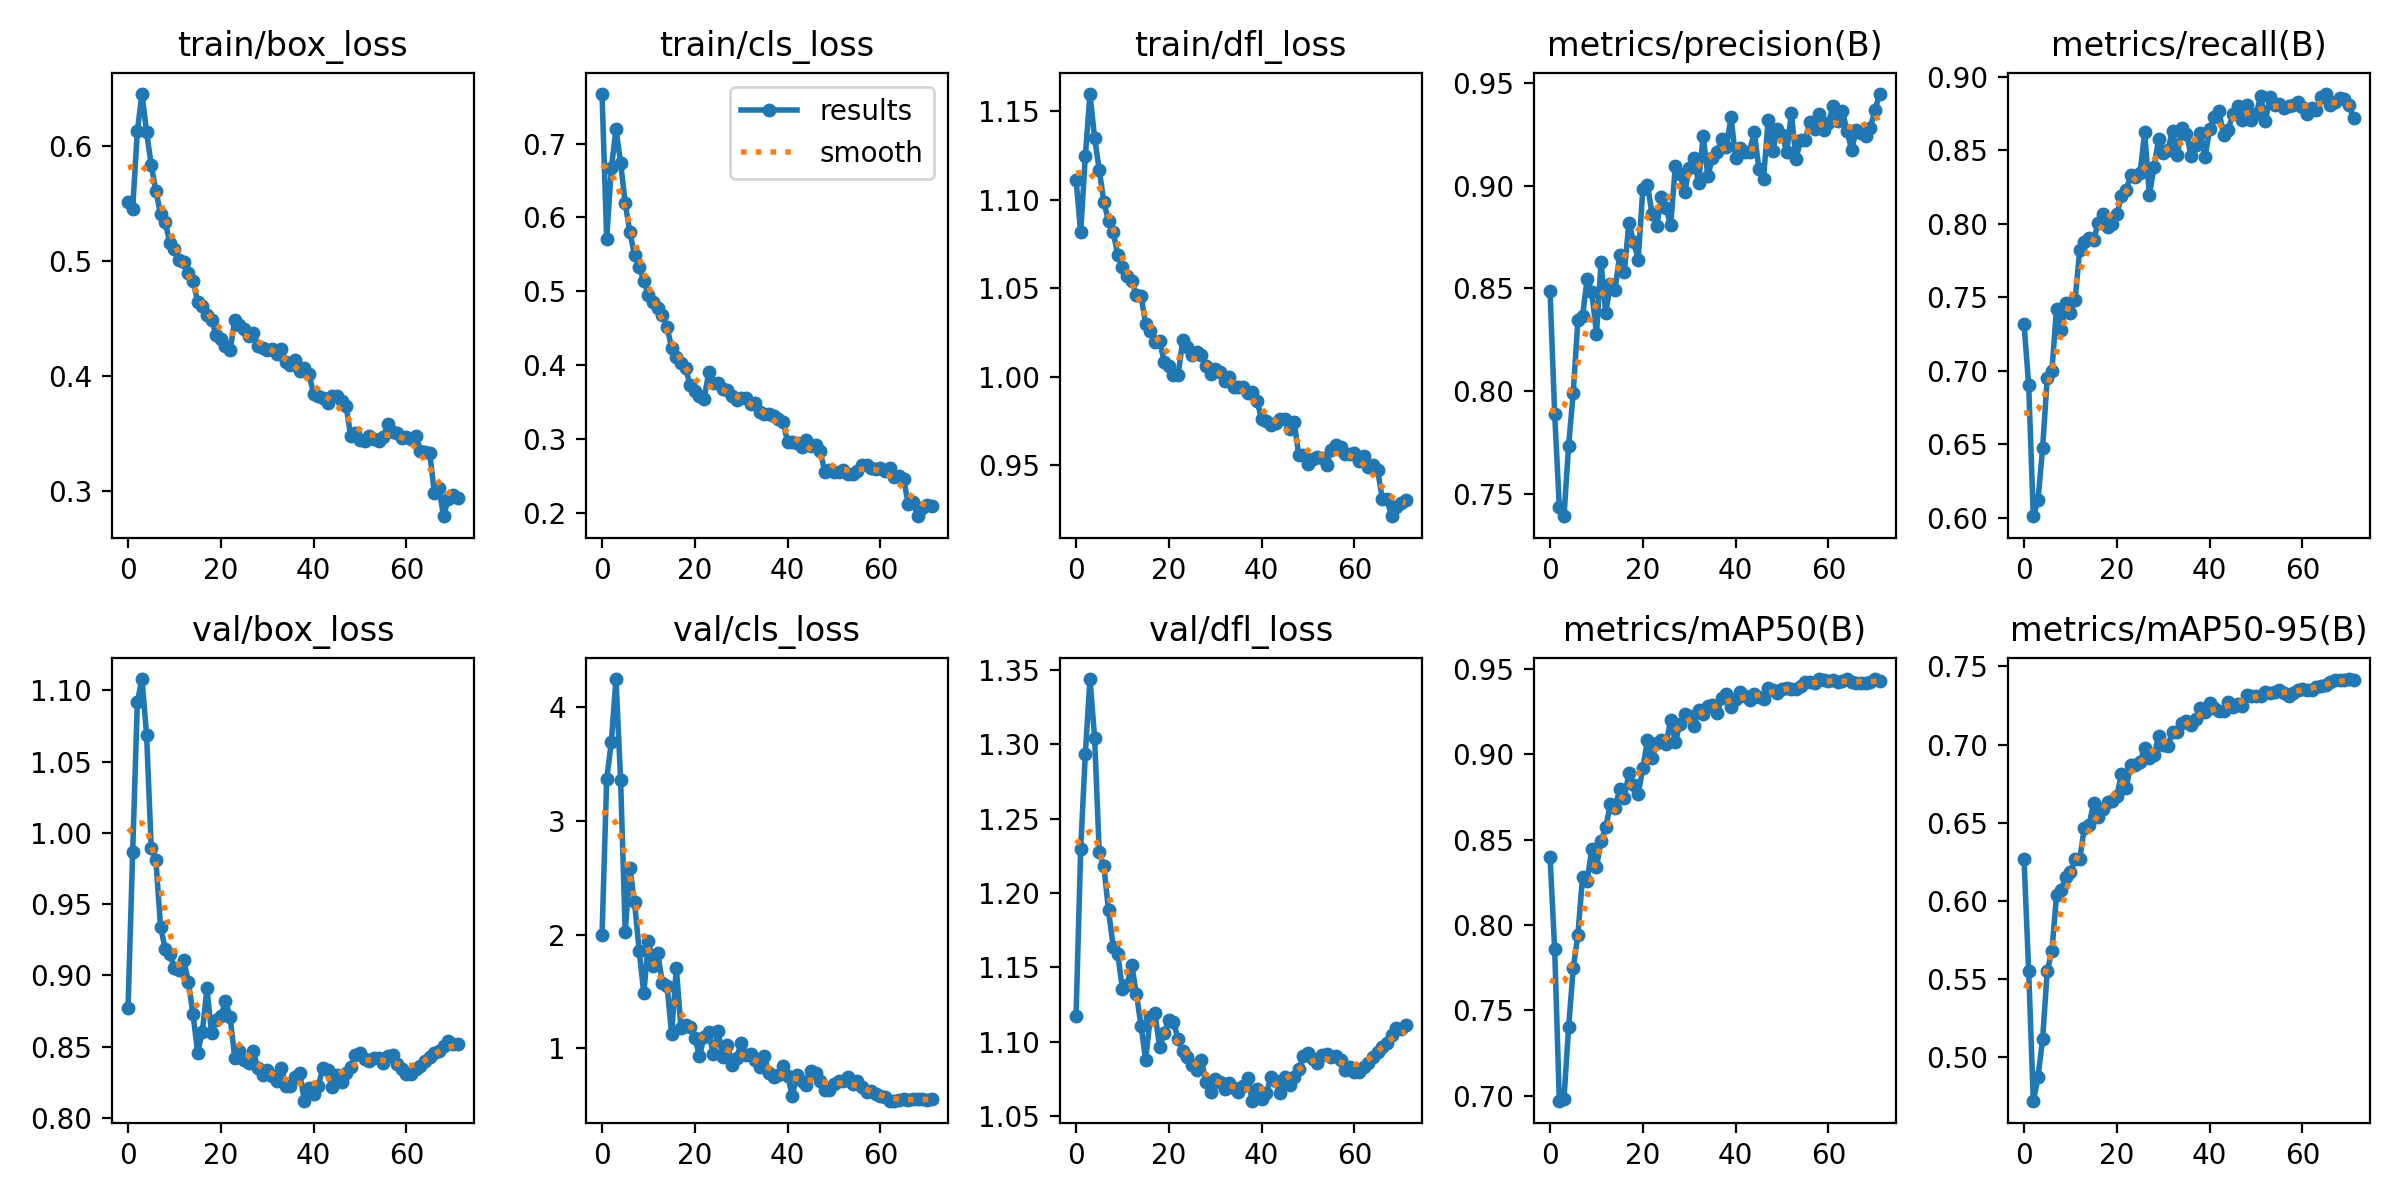

In [ ]:
from IPython.display import Image, display
Image(filename=f'{HOME}/results.png', width=600)